[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1k1EBVhEPUrpAFw9wGcrTlb6pXPOHde7o)


# Install tensorflow

!pip install tensorflow==2.6.2

In [18]:
!pip install pydot

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np 
import pandas as pd 

In [20]:
tf.__version__

'2.9.1'

In [21]:
%load_ext tensorboard
import tensorboard
tensorboard.__version__

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'2.9.1'

In [22]:
!pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

  Cloning https://github.com/tensorflow/docs to /private/var/folders/qk/0_srvgns7zscwh127pk191h00000gn/T/pip-req-build-h5z3n3_u
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /private/var/folders/qk/0_srvgns7zscwh127pk191h00000gn/T/pip-req-build-h5z3n3_u
  Resolved https://github.com/tensorflow/docs to commit 4f2b5dc48ce04d5be021d08d31b7f5c688501965
  Preparing metadata (setup.py) ... done


# Multi-Layer Fully Connected Networks

1. Simply a stack of fully connected layers. 
2. Each fully connected layer is also called a Dense layer and is composed of multiple perceptron units.
3. Each node in the image below is a perceptron


![picture](https://drive.google.com/uc?id=1Eyg4RhUnkaEMsX-eTs6c2REZDPH-4tGS)


## Create a simple feed forward neural network

In [23]:
# Define Sequential model with 2 layers
model = keras.Sequential(
    [
        layers.Dense(4, activation="relu", name="layer1", input_shape=(10, 3)),
        layers.Dense(2, name="layer2"),
    ]
)

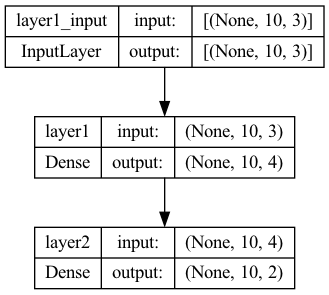

In [24]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10, 4)             16        
                                                                 
 layer2 (Dense)              (None, 10, 2)             10        
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Call model on a test input
x = tf.reshape(tf.random.uniform((10, 3)), (-1,10,3)) #10 samples 3 features 
y = model(x)

## keras.Sequential and model object
* `model`: model is core data structure of keras. It holds the stack of layers created for the model. 

* `keras.Sequential`: creates model object. Provides functions to fit the model and do predict on the model.


# Sample problem : Fashion Mnist

Train a neural network model to classify images of clothing, like sneakers and shirts.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:



In [27]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data
Image shape : 60,000 x 28 x 28

Each image is represented as a 2 dimensional matrix of 28 x 28

In [29]:
train_images.shape,len(train_labels)

((60000, 28, 28), 60000)

In [30]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

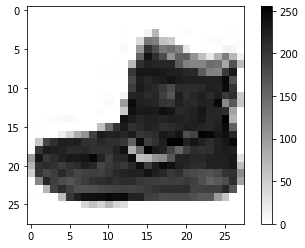

In [31]:
plt.imshow(train_images[0], plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess images
Normalize pixel values in the range [0, 1], i.e. divide by 255.

In [32]:
# important to perform each processing step separately on train and test 

train_images = train_images / 255.0

test_images = test_images / 255.0

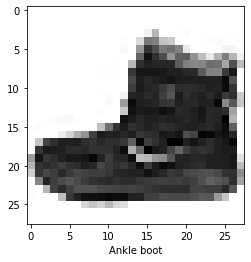

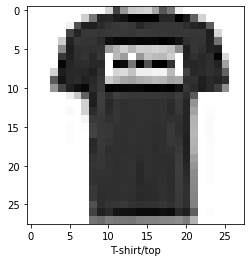

In [33]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[0]])
plt.show()
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[1]])
plt.show()

## Build the model and pipeline using Sequential API

## Setup layers

Flatten -> Dense(128) -> Dense(10) 

Flatten : flatten images i.e. convert 28,28 to 28*28=784 vector

Dense(250): Hidden layer with 250 units

Dense(10): Dense layer with 10 outputs each corresponding to our class label

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Compile the model

Compiling the model means setting up the optimizer and loss function

* **Loss function** —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* **Optimizer** —This is how the model is updated based on the data it sees and its loss function.
* **Metrics** —Used to monitor the training and testing steps. This example uses accuracy, the fraction of the images that are correctly classified.

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 250)               196250    
                                                                 
 dense_1 (Dense)             (None, 10)                2510      
                                                                 
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


Categorical cross entropy : Use when class labels are one hot encoded

Sparse categorical cross entropy : Use when class labels are integers

## Train the model
Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the test_images array.
4. Verify that the predictions match the labels from the test_labels array.

In [36]:
# tensorboard settings to view plots
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(
    train_images, 
    train_labels, 
    epochs=100, 
    batch_size=1000, 
    shuffle=True, 
    callbacks=[tensorboard_callback], 
    validation_split=0.2
)

Epoch 1/100
48/48 [==============================] - 1s 13ms/step - loss: 0.8343 - accuracy: 0.7220 - val_loss: 0.5412 - val_accuracy: 0.8194
Epoch 2/100
48/48 [==============================] - 0s 9ms/step - loss: 0.4957 - accuracy: 0.8319 - val_loss: 0.4852 - val_accuracy: 0.8300
Epoch 3/100
48/48 [==============================] - 0s 8ms/step - loss: 0.4457 - accuracy: 0.8464 - val_loss: 0.4347 - val_accuracy: 0.8528
Epoch 4/100
48/48 [==============================] - 0s 8ms/step - loss: 0.4145 - accuracy: 0.8572 - val_loss: 0.4135 - val_accuracy: 0.8576
Epoch 5/100
48/48 [==============================] - 0s 8ms/step - loss: 0.3939 - accuracy: 0.8645 - val_loss: 0.4139 - val_accuracy: 0.8550
Epoch 6/100
48/48 [==============================] - 0s 8ms/step - loss: 0.3737 - accuracy: 0.8703 - val_loss: 0.3860 - val_accuracy: 0.8656
Epoch 7/100
48/48 [==============================] - 0s 8ms/step - loss: 0.3559 - accuracy: 0.8763 - val_loss: 0.3746 - val_accuracy: 0.8708
Epoch 8/100


Epoch 59/100
48/48 [==============================] - 0s 7ms/step - loss: 0.1398 - accuracy: 0.9526 - val_loss: 0.3148 - val_accuracy: 0.8935
Epoch 60/100
48/48 [==============================] - 0s 7ms/step - loss: 0.1379 - accuracy: 0.9529 - val_loss: 0.3228 - val_accuracy: 0.8908
Epoch 61/100
48/48 [==============================] - 0s 7ms/step - loss: 0.1345 - accuracy: 0.9555 - val_loss: 0.3410 - val_accuracy: 0.8877
Epoch 62/100
48/48 [==============================] - 0s 7ms/step - loss: 0.1364 - accuracy: 0.9550 - val_loss: 0.3193 - val_accuracy: 0.8946
Epoch 63/100
48/48 [==============================] - 0s 8ms/step - loss: 0.1303 - accuracy: 0.9562 - val_loss: 0.3294 - val_accuracy: 0.8891
Epoch 64/100
48/48 [==============================] - 0s 7ms/step - loss: 0.1280 - accuracy: 0.9575 - val_loss: 0.3283 - val_accuracy: 0.8913
Epoch 65/100
48/48 [==============================] - 0s 8ms/step - loss: 0.1275 - accuracy: 0.9566 - val_loss: 0.3216 - val_accuracy: 0.8919
Epoch 

## Evaluate the model on test set

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4030 - accuracy: 0.8861 - 499ms/epoch - 2ms/step

Test accuracy: 0.8860999941825867


## Visual check

Correct labels : blue 

Incorrect labels : red

In [38]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 [==============================] - 0s 1ms/step


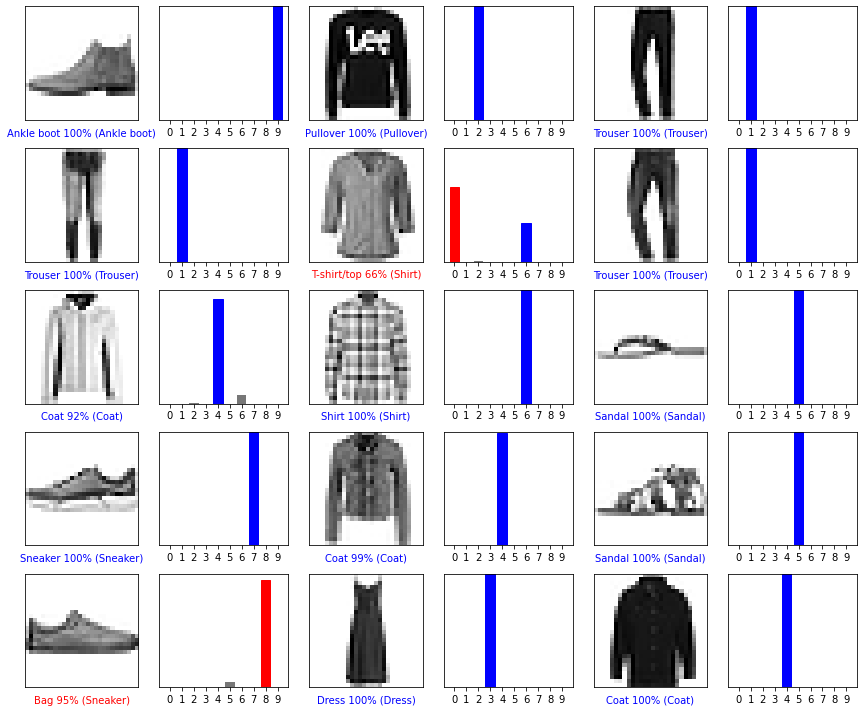

In [39]:
predictions = model.predict(test_images)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Overfitting? 

As a neural network gets deeper the tendency to overfit increases. How to debug if our model is overfitting? 


Does the validation loss rise after some epochs? And if validation loss is higher than the training loss its perfectly fine, your model is still learning. Naturally you can't have validation loss to be less than your training loss (it does become very close to your training loss if the model is deep enough ). But if validation loss rises and your training loss keeps decreasing then you are overfitting. Use early stopping to tackle overfitting.

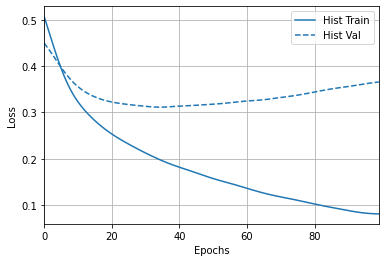

In [40]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)

plotter.plot({'hist': history})

### Early stopping

Stop training when validation loss does not improve any longer.

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])



# tensorboard settings to view plots
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# This callback will stop the training when there is no improvement in
# the loss for 5 consecutive epochs
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                              verbose=1, patience=5)

history = model.fit(train_images, train_labels, batch_size=1000, 
          epochs=100, callbacks=[earlystopping, tensorboard_callback], validation_split=0.2)

# train_images = 48k (20% for validation)

Epoch 1/100
48/48 [==============================] - 1s 10ms/step - loss: 0.7965 - accuracy: 0.7356 - val_loss: 0.5378 - val_accuracy: 0.8142
Epoch 2/100
48/48 [==============================] - 0s 8ms/step - loss: 0.4908 - accuracy: 0.8338 - val_loss: 0.4707 - val_accuracy: 0.8394
Epoch 3/100
48/48 [==============================] - 0s 8ms/step - loss: 0.4410 - accuracy: 0.8493 - val_loss: 0.4350 - val_accuracy: 0.8499
Epoch 4/100
48/48 [==============================] - 0s 8ms/step - loss: 0.4095 - accuracy: 0.8593 - val_loss: 0.4143 - val_accuracy: 0.8556
Epoch 5/100
48/48 [==============================] - 0s 8ms/step - loss: 0.3931 - accuracy: 0.8635 - val_loss: 0.4034 - val_accuracy: 0.8587
Epoch 6/100
48/48 [==============================] - 0s 8ms/step - loss: 0.3726 - accuracy: 0.8697 - val_loss: 0.3847 - val_accuracy: 0.8649
Epoch 7/100
48/48 [==============================] - 0s 8ms/step - loss: 0.3569 - accuracy: 0.8749 - val_loss: 0.3772 - val_accuracy: 0.8668
Epoch 8/100


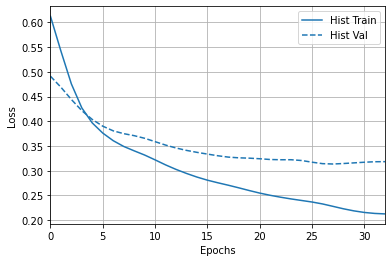

In [42]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)

plotter.plot({'hist': history})

In [43]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3370 - accuracy: 0.8837 - 510ms/epoch - 2ms/step

Test accuracy: 0.8837000131607056


### Dropout

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])



# tensorboard settings to view plots
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# This callback will stop the training when there is no improvement in
# the loss for 5 consecutive epochs
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                              verbose=1, patience=5)



history = model.fit(train_images, train_labels, batch_size=1000, 
          epochs=100, callbacks=[earlystopping, tensorboard_callback], validation_split=0.2)

# train_images = 48k (20% for validation)

Epoch 1/100
48/48 [==============================] - 1s 12ms/step - loss: 0.8903 - accuracy: 0.6924 - val_loss: 0.5528 - val_accuracy: 0.8112
Epoch 2/100
48/48 [==============================] - 0s 10ms/step - loss: 0.5412 - accuracy: 0.8151 - val_loss: 0.4717 - val_accuracy: 0.8378
Epoch 3/100
48/48 [==============================] - 0s 9ms/step - loss: 0.4749 - accuracy: 0.8382 - val_loss: 0.4337 - val_accuracy: 0.8489
Epoch 4/100
48/48 [==============================] - 0s 10ms/step - loss: 0.4372 - accuracy: 0.8484 - val_loss: 0.4190 - val_accuracy: 0.8552
Epoch 5/100
48/48 [==============================] - 0s 9ms/step - loss: 0.4130 - accuracy: 0.8560 - val_loss: 0.3965 - val_accuracy: 0.8566
Epoch 6/100
48/48 [==============================] - 0s 10ms/step - loss: 0.3925 - accuracy: 0.8628 - val_loss: 0.3768 - val_accuracy: 0.8687
Epoch 7/100
48/48 [==============================] - 1s 11ms/step - loss: 0.3754 - accuracy: 0.8676 - val_loss: 0.3669 - val_accuracy: 0.8714
Epoch 8/

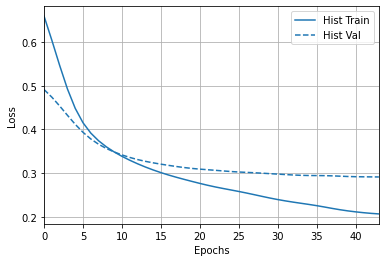

In [45]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)

plotter.plot({'hist': history})

In [46]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3179 - accuracy: 0.8903 - 546ms/epoch - 2ms/step

Test accuracy: 0.8902999758720398
